In [8]:
import pandas as pd
df = pd.read_csv('datasetFlashScore.csv', delimiter = ';')
resultado_jogo = []

for i in range(len(df['FTHG'])):
    if int(df['FTHG'][i]) > int(df['FTAG'][i]):
        resultado_jogo.append("Vitória do time da casa")
    elif int(df['FTHG'][i]) < int(df['FTAG'][i]):
        resultado_jogo.append("Vitória do time visitante")
    else:
        resultado_jogo.append("Empate")

df['Resultado'] = resultado_jogo
dfTestes = df.head(20)
dfTreinamento = df.iloc[20:]

In [9]:
from pycaret.classification import *
s = setup(dfTreinamento, target = 'Resultado', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Resultado
2,Target type,Multiclass
3,Target mapping,"Empate: 0, Vitória do time da casa: 1, Vitória do time visitante: 2"
4,Original data shape,"(360, 42)"
5,Transformed data shape,"(360, 142)"
6,Transformed train set shape,"(251, 142)"
7,Transformed test set shape,"(109, 142)"
8,Numeric features,20
9,Categorical features,21


In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8765,0.0000,0.8765,0.8827,0.8744,0.8067,0.8106,0.5220
ridge,Ridge Classifier,0.6334,0.0000,0.6334,0.6194,0.6121,0.4149,0.4253,0.0440
lightgbm,Light Gradient Boosting Machine,0.5422,0.7806,0.5422,0.5132,0.5038,0.2498,0.2637,0.1330
lda,Linear Discriminant Analysis,0.5297,0.0000,0.5297,0.5051,0.4597,0.1997,0.2350,0.0430
gbc,Gradient Boosting Classifier,0.5260,0.0000,0.5260,0.5202,0.4795,0.2188,0.2436,0.1290
et,Extra Trees Classifier,0.4582,0.6492,0.4582,0.3337,0.3455,0.0490,0.0716,0.0660
rf,Random Forest Classifier,0.4542,0.6933,0.4542,0.3621,0.3356,0.0354,0.0693,0.0700
dummy,Dummy Classifier,0.4542,0.5000,0.4542,0.2066,0.2839,0.0000,0.0000,0.0420
svm,SVM - Linear Kernel,0.4388,0.0000,0.4388,0.5312,0.3545,0.1442,0.2278,0.0470
knn,K Neighbors Classifier,0.3746,0.5560,0.3746,0.3609,0.3564,0.0219,0.0244,0.2790


In [11]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9600,0.0000,0.9600,0.9650,0.9598,0.9384,0.9407
2,0.8000,0.0000,0.8000,0.7933,0.7949,0.6891,0.6908
3,0.8800,0.0000,0.8800,0.8833,0.8794,0.8153,0.8173
4,0.9200,0.0000,0.9200,0.9200,0.9200,0.8768,0.8768
5,0.9200,0.0000,0.9200,0.9378,0.9183,0.8768,0.8856
6,0.8800,0.0000,0.8800,0.9011,0.8695,0.8134,0.8282
7,0.9200,0.0000,0.9200,0.9400,0.9233,0.8759,0.8825
8,0.9200,0.0000,0.9200,0.9400,0.9233,0.8759,0.8825


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(best)

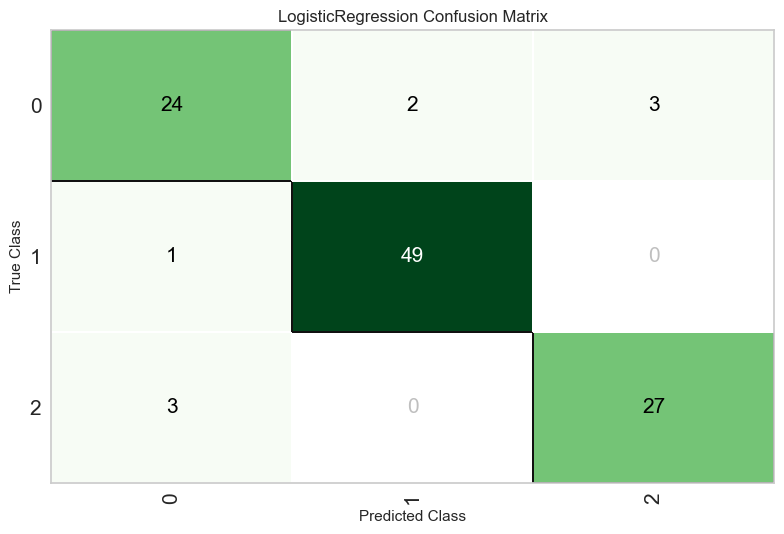

In [13]:
plot_model(best, plot='confusion_matrix')

In [14]:
predictions = predict_model(best, data=dfTestes, raw_score = True)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9000,0,0.9000,0.8333,0.8600,0.7778,0.7963


,HomeTeam,AwayTeam,DateTime,FTHG,FTAG,HGE,AGE,HPB,APB,HTG,...,APC,HATK,AATK,HATKP,AATKP,Resultado,prediction_label,prediction_score_Empate,prediction_score_Vitória do time da casa,prediction_score_Vitória do time visitante
0,Bahia,Atlético-MG,06.12.2023 21:30,4,1,1.50,1.00,38%,62%,14,...,466,81,111,45,26,Vitória do time da casa,Vitória do time da casa,0.0002,0.9998,0.0000
1,Coritiba,Corinthians,06.12.2023 21:30,0,2,0.55,0.58,43%,57%,12,...,617,93,104,63,45,Vitória do time visitante,Vitória do time visitante,0.0094,0.0000,0.9906
2,Cruzeiro,Palmeiras,06.12.2023 21:30,1,1,1.26,1.47,51%,49%,14,...,298,116,60,38,26,Empate,Vitória do time visitante,0.2634,0.2145,0.5222
3,Cuiabá,Athletico-PR,06.12.2023 21:30,3,0,2.74,0.85,47%,53%,12,...,436,76,102,28,62,Vitória do time da casa,Vitória do time da casa,0.0000,1.0000,0.0000
4,Fluminense,Grêmio,06.12.2023 21:30,2,3,2.10,2.10,62%,38%,20,...,238,146,68,76,27,Vitória do time visitante,Vitória do time visitante,0.1307,0.0010,0.8683
5,Internacional,Botafogo,06.12.2023 21:30,3,1,1.48,0.45,53%,47%,7,...,417,104,120,21,31,Vitória do time da casa,Vitória do time da casa,0.0013,0.9987,0.0000
6,Santos,Fortaleza,06.12.2023 21:30,1,2,0.97,0.94,57%,43%,14,...,231,112,81,72,32,Vitória do time visitante,Vitória do time visitante,0.4875,0.0078,0.5047
7,São Paulo,Flamengo,06.12.2023 21:30,1,0,0.52,0.44,47%,53%,9,...,479,73,112,26,49,Vitória do time da casa,Vitória do time da casa,0.0362,0.9633,0.0006
8,Vasco,Red Bull Bragantino,06.12.2023 21:30,2,1,1.83,0.88,46%,54%,11,...,333,88,108,44,35,Vitória do time da casa,Vitória do time da casa,0.0176,0.9813,0.0011
9,Goiás,América-MG,06.12.2023 19:00,1,0,0.91,0.91,46%,54%,12,...,457,66,128,44,62,Vitória do time da casa,Vitória do time da casa,0.1939,0.8051,0.0010
